[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/Ex08_forecasting_financial/Ex08b_Forecasting_fin_data.ipynb)

# Exercise LSTM time series forecasting
In this exercise, we will illustrate deficiencies of feed forward neural network when the data is time dependent (time series data). You will see how recurrent neural networks (especially LSTM's) can overcome these deficiencies. We simulate a very simple time series and your task will be to fit a feed forward neural network as well as a LSTM and to compare their predictions. When fitting a model to time series data, you always have to choose the time lag order. Here we keep things simple and just chose a lag order of 1. This means we build models which predict $y_{t}$ based on the feature $y_{t-1}$.

You can use the demo notebooks in demos/forecasting_financial to see how to fit LSTM's.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers

In [50]:
## Simulate time series ts
time_window = np.array(range(0, 100))
y = np.sin(time_window)

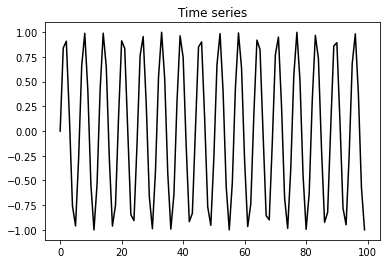

In [51]:
## Plot time series
plt.plot(time_window, y, color = 'black')
plt.title('Time series')
plt.show()
plt.close()

## Exercise 1
Transform the time series data ts into a target $y=\left(\begin{array}{cc} 
y_{1} \\
y_{2}  \\
\vdots  \\
y_{t-1} \\
y_{t} 
\end{array}\right)$ and a feature matrix (with only one column) 
$X=\left(\begin{array}{cc} 
y_{0}\\
y_{1} \\
\vdots \\
y_{t-2}\\
y_{t-1}
\end{array}\right)$. Choose the first 80 observations as training data and the remaining observations as test data. Use the function "create_dataset", provided below.

In [17]:
## prepare data for model building
def create_dataset(time_series, window_size):
    """ Function to create data set with lagged response values for estimating an autoregressive model"""
    dataX, dataY = [], []
    
    for i in range(0,len(time_series) - window_size - 1):
        x = time_series[i:i + window_size] # Remember: x[a:b-1]
        dataX.append(x)
        y = time_series[i + window_size] # Remember: x[b]
        dataY.append(y)
           
    return np.array(dataX), np.array(dataY)

## Exercise 2
Fit a feed-forward neural network of your choice and make predictions on the training and test set. Plot the predictions in comparison to the time series y.

# Exercise 3
Now fit an LSTM of your choice and plot its predictions on the training and test set against the true values y.